In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/home/d/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("data/datasets_902_370089_accepted_2007_to_2018Q4.csv")

/home/d/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [181]:
df_accept = df.sample(frac=0.1)

In [182]:
len(df_accept)

226070

In [183]:
pd.options.display.max_columns

151

In [184]:
pd.options.display.max_columns = len(df_accept.columns)

In [185]:
df_accept.shape

(226070, 151)

In [187]:
df_accept.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
574268,117034021,NaN,8000.0,8000.0,8000.0,36 months,13.59,271.84,C,C2,owner,10+ years,OWN,60000.0,Not Verified,Aug-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,183xx,PA,15.48,0.0,Aug-2006,690.0,694.0,1.0,NaN,NaN,5.0,0.0,474.0,23.7,7.0,w,4181.87,4181.87,5152.88,5152.88,3818.13,1334.75,0.0,0.0,0.0,Mar-2019,271.84,Apr-2019,Mar-2019,714.0,710.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,900.0,24383.0,1.0,2.0,1.0,1.0,6.0,23909.0,61.0,0.0,0.0,171.0,59.0,2000.0,1.0,0.0,1.0,1.0,4877.0,829.0,17.1,0.0,0.0,48.0,132.0,47.0,6.0,0.0,47.0,NaN,6.0,NaN,0.0,1.0,2.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,41456.0,24383.0,1000.0,39456.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1727065,96699747,NaN,2000.0,2000.0,2000.0,36 months,15.99,70.31,C,C5,Funeral Director,10+ years,MORTGAGE,60000.0,Source Verified,Jan-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,397xx,MS,3.80,1.0,Jun-1994,690.0,694.0,1.0,16.0,NaN,7.0,0.0,1844.0,37.6,42.0,f,653.97,653.97,1826.28,1826.28,1346.03,480.25,0.0,0.0,0.0,Mar-2019,70.31,Apr-2019,Mar-2019,674.0,670.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,160631.0,2.0,1.0,1.0,1.0,9.0,5128.0,85.0,1.0,3.0,1466.0,64.0,4900.0,4.0,0.0,5.0,6.0,26772.0,534.0,73.3,0.0,0.0,130.0,271.0,6.0,4.0,4.0,6.0,37.0,1.0,16.0,0.0,1.0,2.0,1.0,10.0,19.0,5.0,19.0,2.0,7.0,0.0,0.0,0.0,3.0,94.9,0.0,0.0,0.0,165950.0,6972.0,2000.0,6050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Na

In [188]:
df_accept.loan_status.unique()

array(['Current', 'Charged Off', 'Fully Paid', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', nan,
       'Default'], dtype=object)

In [189]:
df_accept.loan_status.isna().sum()

4

In [190]:
df_drop =  df_accept.loc[df_accept.loan_status.isna()]

In [191]:
df_accept.drop(df_drop.index, inplace=True)

In [192]:
df_accept.loan_status.unique()

array(['Current', 'Charged Off', 'Fully Paid', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Default'],
      dtype=object)

In [193]:
len(df_accept)

226066

In [194]:
len(df_accept.loan_status)

226066

In [195]:
df_accept.loan_status.value_counts()

Fully Paid                                             107664
Current                                                 87869
Charged Off                                             26853
Late (31-120 days)                                       2158
In Grace Period                                           866
Late (16-30 days)                                         396
Does not meet the credit policy. Status:Fully Paid        180
Does not meet the credit policy. Status:Charged Off        78
Default                                                     2
Name: loan_status, dtype: int64

In [196]:
temp = df_accept.loan_status == 'Current'

In [197]:
current_rows = df_accept[temp]

In [198]:
len(current_rows)

87869

In [199]:
# lets remove the loan which are current
df_accept.drop(current_rows.index, inplace=True)

In [200]:
df_accept.loan_status.unique()

array(['Charged Off', 'Fully Paid', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Default'],
      dtype=object)

In [201]:
# now lets change the loan_status in two category only (0 = Default, 1 = None-Default)
default_column_names = ["Charged Off", "Late (31-120 days)", "In Grace Period", "In Grace Period", "Does not meet the credit policy. Status:Charged Off", "Default" ]
def change_loan_status(status):
    if status in default_column_names:
        return 0
    else:
        return 1

In [202]:
df_accept.loan_status = df_accept.loan_status.apply(change_loan_status)

In [203]:
df_accept.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
286378,48554466,NaN,19125.0,19125.0,19125.0,60 months,18.84,494.44,E,E2,Food & Beverage manager,7 years,MORTGAGE,52000.0,Not Verified,May-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,330xx,FL,9.69,0.0,Oct-2007,675.0,679.0,1.0,NaN,NaN,8.0,0.0,19393.0,59.7,19.0,w,0.0,0.0,2452.180000,2452.18,1001.86,1450.32,0.0,0.00,0.0000,Oct-2015,494.44,NaN,Mar-2019,514.0,510.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,208935.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32500.0,NaN,NaN,NaN,3.0,26117.0,8107.0,70.5,0.0,0.0,91.0,87.0,4.0,4.0,1.0,4.0,NaN,0.0,NaN,0.0,4.0,4.0,6.0,8.0,9.0,7.0,9.0,4.0,8.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,222500.0,19393.0,27500.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1912669,1461282,NaN,5000.0,5000.0,4975.0,36 months,11.14,164.03,B,B2,Ruth Fernandez Family Residence,4 years,OWN,39000.0,Verified,Aug-2012,1,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 08/07/12 > Pay down debt<br>,other,Other,100xx,NY,13.29,0.0,May-1994,745.0,749.0,5.0,NaN,NaN,4.0,0.0,21015.0,32.8,12.0,f,0.0,0.0,5904.879295,5875.35,5000.00,904.88,0.0,0.00,0.0000,Aug-2015,164.25,NaN,Aug-2015,739.0,735.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,42985.0,32.8,0.0,0.0,NaN,NaN,NaN,NaN,0.0,96.0,NaN,0.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,21015.0,64000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [204]:
df_accept.loan_status.value_counts()

1    108240
0     29957
Name: loan_status, dtype: int64

In [205]:
# calculating for missing data percentage
missing_value_count = df_accept.isnull().sum()
missing_per = missing_value_count / len(df_accept) * 100
missing_per

id                         0.000000
member_id                100.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
                            ...    
settlement_status         97.529614
settlement_date           97.529614
settlement_amount         97.529614
settlement_percentage     97.529614
settlement_term           97.529614
Length: 151, dtype: float64

In [206]:
# missing data more then 50%
missing_data_columns = missing_per[missing_per >= 50].index.values

In [207]:
missing_data_columns

array(['member_id', 'desc', 'mths_since_last_delinq',
       'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq',
       'revol_bal_joint', 'sec_app_fico_range_low',
       'sec_app_fico_range_high', 'sec_app_earliest_cr_line',
       'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
       'sec_app_revol_util', 'sec_app_open_act_il',
       'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_

In [208]:
# dropping column which have more then 40% data missing
df_accept.drop(columns=missing_data_columns, inplace=True)

In [209]:
len(df_accept.columns)

93

In [210]:
df_accept.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'a

In [211]:
# now lets work on NA values
def display_na_per(df_accept):
    null_count = df_accept.isna().sum()
    total_count = len(df_accept)
    per = null_count / total_count * 100
    missing_df = pd.concat([null_count, per], axis=1)
    missing_df.columns = ["Null Counts", "Percentage"]
    return missing_df.sort_values(by="Percentage", ascending=False).T
display_na_per(df_accept)

,mths_since_recent_inq,num_tl_120dpd_2m,mo_sin_old_il_acct,emp_title,emp_length,pct_tl_nvr_dlq,avg_cur_bal,tot_hi_cred_lim,num_rev_tl_bal_gt_0,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,tot_coll_amt,num_tl_op_past_12m,num_tl_30dpd,tot_cur_bal,total_il_high_credit_limit,num_tl_90g_dpd_24m,total_rev_hi_lim,bc_util,percent_bc_gt_75,bc_open_to_buy,mths_since_recent_bc,num_sats,num_bc_sats,mort_acc,total_bal_ex_mort,total_bc_limit,acc_open_past_24mths,title,last_pymnt_d,pub_rec_bankruptcies,revol_util,dti,collections_12_mths_ex_med,chargeoff_within_12_mths,last_credit_pull_d,tax_liens,delinq_amnt,acc_now_delinq,open_acc,total_acc,pub_rec,inq_last_6mths,earliest_cr_line,delinq_2yrs,annual_inc,hardship_flag,disbursement_method,id,last_fico_range_high,application_type,home_ownership,purpose,url,pymnt_plan,loan_status,issue_d,verification_status,sub_grade,addr_state,grade,installment,int_rate,term,funded_amnt_inv,funded_amnt,zip_code,fico_range_low,policy_code,total_rec_int,last_fico_range_low,loan_amnt,last_pymnt_amnt,collection_recovery_fee,recoveries,total_rec_late_fee,total_rec_prncp,fico_range_high,total_pymnt_inv,total_pymnt,out_prncp_inv,out_prncp,initial_list_status,revol_bal,debt_settlement_flag
Null Counts,17951.000000,12235.000000,10973.000000,8952.000000,8170.00000,7109.000000,7095.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,6614.000000,6598.000000,6542.000000,6446.000000,5914.000000,5914.000000,5096.00000,5096.00000,5096.00000,5096.00000,1682.000000,237.000000,127.000000,99.000000,42.000000,9.000000,9.000000,8.000000,7.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,12.989428,8.853304,7.940114,6.477709,5.91185,5.144106,5.133975,5.131805,5.131805,5.131805,5.131805,5.131805,5.131805,5.131805,5.131805,5.131805,5.131805,5.131805,5.131805,5.131805,5.131805,5.131805,5.131805,5.131805,5.131805,5.131805,4.785922,4.774344,4.733822,4.664356,4.279398,4.279398,3.68749,3.68749,3.68749,3.68749,1.217103,0.171494,0.091898,0.071637,0.030391,0.006512,0.006512,0.005789,0.005065,0.001447,0.001447,0.001447,0.001447,0.001447,0.001447,0.001447,0.001447,0.000724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [212]:
# dropping row which have more then 10 missing values
rows_na_index = df_accept[df_accept.isna().sum(axis=1) >= 20].index

In [213]:
df_accept.drop(rows_na_index, inplace=True)

In [214]:
display_na_per(df_accept)

,mths_since_recent_inq,emp_title,emp_length,num_tl_120dpd_2m,mo_sin_old_il_acct,title,bc_util,percent_bc_gt_75,bc_open_to_buy,mths_since_recent_bc,last_pymnt_d,revol_util,dti,pct_tl_nvr_dlq,last_credit_pull_d,avg_cur_bal,mo_sin_old_rev_tl_op,mort_acc,mo_sin_rcnt_tl,mo_sin_rcnt_rev_tl_op,total_rev_hi_lim,tot_coll_amt,tot_cur_bal,delinq_amnt,chargeoff_within_12_mths,num_accts_ever_120_pd,acc_open_past_24mths,id,num_bc_tl,num_actv_bc_tl,num_tl_op_past_12m,disbursement_method,hardship_flag,total_il_high_credit_limit,total_bc_limit,total_bal_ex_mort,tot_hi_cred_lim,tax_liens,pub_rec_bankruptcies,num_tl_90g_dpd_24m,num_actv_rev_tl,num_tl_30dpd,num_sats,num_rev_tl_bal_gt_0,num_rev_accts,num_op_rev_tl,num_il_tl,application_type,num_bc_sats,acc_now_delinq,last_fico_range_high,policy_code,verification_status,delinq_2yrs,addr_state,zip_code,purpose,url,pymnt_plan,loan_status,issue_d,annual_inc,collections_12_mths_ex_med,home_ownership,sub_grade,grade,installment,int_rate,term,funded_amnt_inv,funded_amnt,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,last_fico_range_low,loan_amnt,last_pymnt_amnt,collection_recovery_fee,recoveries,total_rec_late_fee,total_rec_int,total_rec_prncp,total_pymnt_inv,total_pymnt,out_prncp_inv,out_prncp,initial_list_status,total_acc,revol_bal,pub_rec,open_acc,debt_settlement_flag
Null Counts,12599.000000,8491.000000,7934.000000,5143.00000,3881.000000,1679.000000,1493.000000,1478.000000,1422.000000,1329.000000,222.00000,88.000000,42.000000,17.000000,7.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,9.609855,6.476488,6.051638,3.92281,2.960223,1.280653,1.138782,1.127341,1.084627,1.013691,0.16933,0.067122,0.032035,0.012967,0.005339,0.002288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
# drop emp_length value that does not have any other way to find the year
emp_length_drop_index = df_accept[df_accept["emp_length"].isna()].index
df_accept.drop(emp_length_drop_index, inplace=True)

In [216]:
# replacing N/A with zero
df_accept["mths_since_recent_inq"] = df_accept["mths_since_recent_inq"].replace(np.nan, 0)
# creating the new employee title NA which is for N/A people
df_accept["emp_title"] = df_accept["emp_title"].replace(np.nan, "NA")
# removing the year from the emp_length
df_accept["emp_length"] = df_accept["emp_length"].replace(r"years|year","", regex=True).str.strip()
# replacing the N/A value with zero as they hace three category only
df_accept["num_tl_120dpd_2m"] = df_accept["num_tl_120dpd_2m"].replace(np.nan,0)
# replacing the N/A with the zero because the min value start from 1 so information not available so i have make it zero
df_accept["mo_sin_old_il_acct"] = df_accept["mo_sin_old_il_acct"].replace(np.nan, 0)
# replacing the N/A with the NO_TITLE as that have many different title
df_accept["title"] = df_accept["title"].replace(np.nan, "NO_TITLE")
# replacing the "bc_util" it is ratio blance of high credit so replacing with mean
bc_util_na_index = df_accept[df_accept["bc_util"].isna()].index
df_accept.loc[bc_util_na_index, "bc_util"] = df_accept["bc_util"].mean()
# replacing the "percent_bc_gt_75" it is percentage so replacing with the mean
precent_bc_gt_75_na_index = df_accept[df_accept["percent_bc_gt_75"].isna()].index
df_accept.loc[precent_bc_gt_75_na_index, "percent_bc_gt_75"] = df_accept["percent_bc_gt_75"].mean()
# replacing the "bc_open_to_buy" It has the less amount of the N/A value so replacing with zero
df_accept["bc_open_to_buy"] = df_accept["bc_open_to_buy"].replace(np.nan, 0)
# replacing the "mths_since_recent_bc" It has the less amount of the N/a value so replacing with zero
df_accept["mths_since_recent_bc"] = df_accept["mths_since_recent_bc"].replace(np.nan, 0)

In [217]:
# droing last_payment_date missing values
last_payment_na_index = df_accept[df_accept["last_pymnt_d"].isna()].index
df_accept.drop(last_payment_na_index, inplace=True)

In [218]:
# replacing the "revol_util" with mean value because it is ratio value how much amount of credit the borrower is using relative to all available revolving credit.
#df_accept.loc[]
revol_util_index = df_accept[df_accept["revol_util"].isna()].index
df_accept.loc[revol_util_index, "revol_util"] = df_accept["revol_util"].mean()

In [219]:
# replacing the "pct_tl_nvr_dlq" with mean value because it is percentage trades never delinquent 
pct_tl_nvr_dlq_na_index = df_accept[df_accept["pct_tl_nvr_dlq"].isna()].index
df_accept.loc[pct_tl_nvr_dlq_na_index , "pct_tl_nvr_dlq"] = df_accept["pct_tl_nvr_dlq"].mean()

In [220]:
# droping the "last_credit_pull_d" as it is date
last_credit_pull_d_na_index = df_accept[df_accept["last_credit_pull_d"].isna()].index
df_accept.drop(last_credit_pull_d_na_index, inplace=True)

In [221]:
# replacing the "avg_cur_bal" with mean value 
avg_cur_bal_na_index = df_accept[df_accept["avg_cur_bal"].isna()].index
df_accept.loc[avg_cur_bal_na_index, "avg_cur_bal"] = df_accept["avg_cur_bal"].mean()

In [222]:
# replacing the "dti" with mean value
dti_na_index = df_accept[df_accept["dti"].isna()].index
df_accept.loc[dti_na_index, "dti"] = df_accept["dti"].mean()

In [223]:
# removing the month string "term" from
df_accept["term"] = df_accept["term"].replace("months", "", regex=True).str.strip()
df_accept["term"] = df_accept["term"].astype("int")

In [224]:
# setting the "grade" column as categorical
df_accept["grade"] = df_accept["grade"].astype("category")

In [225]:
# setting the "sub_grade" column as categorical
df_accept["sub_grade"] = df_accept["sub_grade"].astype("category")

In [226]:
# setting the "emp_length" column as categorical
df_accept["emp_length"] = df_accept["emp_length"].astype("category")

In [227]:
# setting the "home_ownership" column as categorical
df_accept["home_ownership"] = df_accept["home_ownership"].astype("category")

In [228]:
# setting the "verification_status" column as categorical
df_accept["verification_status"] = df_accept["verification_status"].astype("category")

In [229]:
# setting loan_status as categorical
df_accept["loan_status"] = df_accept["loan_status"].astype("category")

In [230]:
# setting "pymnt_plan" as categorical column
df_accept["pymnt_plan"] = df_accept["pymnt_plan"].astype("category")

In [231]:
df_accept["purpose"] = df_accept["purpose"].astype("category")

In [232]:
df_accept["addr_state"] = df_accept["addr_state"].astype("category")

In [233]:
df_accept["initial_list_status"] = df_accept["initial_list_status"].astype("category")

In [234]:
df_accept["application_type"] = df_accept["application_type"].astype("category")

In [235]:
df_accept["hardship_flag"] = df_accept["hardship_flag"].astype("category")

In [236]:
df_accept["disbursement_method"] = df_accept["disbursement_method"].astype("category")

In [237]:
df_accept["debt_settlement_flag"] = df_accept["debt_settlement_flag"].astype("category")

In [238]:
df_accept["debt_settlement_flag"].unique()

['N', 'Y']
Categories (2, object): ['N', 'Y']

In [239]:
# removing the dummy columns
drop_column_list = ["id", "issue_d", "url", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]
df_accept.drop(columns=drop_column_list, axis=1, inplace=True)

In [240]:
def filter_column_based_on_type(df, type_name):
    arr = []
    for column in df.columns:        
        if df[column].dtype.name == type_name:
            arr.append(column)
    return arr;

In [241]:
filter_column_based_on_type(df_accept, "object")

['emp_title', 'title', 'zip_code']

In [242]:
df_accept["zip_code"].value_counts()

750xx    1429
945xx    1396
112xx    1298
300xx    1102
331xx    1094
         ... 
522xx       1
092xx       1
008xx       1
506xx       1
861xx       1
Name: zip_code, Length: 887, dtype: int64

In [243]:
len(df_accept["zip_code"].unique())

887

In [244]:
len(df_accept)

122961

In [245]:
def diaply_describe(df, type_name):
    for column in df.columns:
        if df[column].dtype.name == type_name:
            print("==================================")
            print(df[column].describe())
            print("==================================")

In [246]:
diaply_describe(df_accept, "float64")

count    122961.000000
mean      14821.458430
std        8811.361923
min        1000.000000
25%        8000.000000
50%       12800.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64
count    122961.000000
mean      14821.427119
std        8811.350362
min        1000.000000
25%        8000.000000
50%       12800.000000
75%       20000.000000
max       40000.000000
Name: funded_amnt, dtype: float64
count    122961.000000
mean      14815.476108
std        8808.241835
min         725.000000
25%        8000.000000
50%       12750.000000
75%       20000.000000
max       40000.000000
Name: funded_amnt_inv, dtype: float64
count    122961.000000
mean         13.292745
std           4.834258
min           5.310000
25%           9.750000
50%          12.740000
75%          16.020000
max          30.990000
Name: int_rate, dtype: float64
count    122961.000000
mean        449.072814
std         264.074704
min          30.120000
25%         257.200000
50%         38

count    122961.000000
mean          0.514423
std           1.335056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          33.000000
Name: num_accts_ever_120_pd, dtype: float64
count    122961.000000
mean          3.657656
std           2.255576
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          30.000000
Name: num_actv_bc_tl, dtype: float64
count    122961.000000
mean          5.659364
std           3.316985
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          63.000000
Name: num_actv_rev_tl, dtype: float64
count    122961.000000
mean          4.753450
std           2.963849
min           0.000000
25%           3.000000
50%           4.000000
75%           6.000000
max          41.000000
Name: num_bc_sats, dtype: float64
count    122961.000000
mean          8.075853
std           4.763830
min           0.000000
25%           5.000

In [247]:
diaply_describe(df_accept, "int64")

count    122961.000000
mean         42.061239
std          10.427464
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: term, dtype: float64


In [248]:
corr = df_accept.corr()

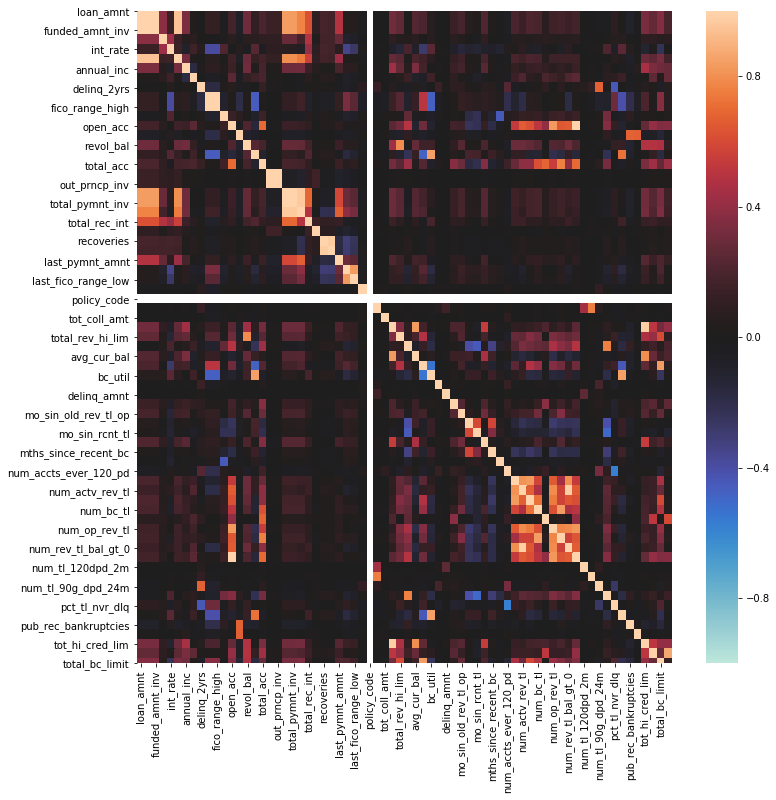

In [249]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, vmin=-1, vmax=1, center=0)

In [250]:
df_accept["policy_code"].value_counts()

1.0    122961
Name: policy_code, dtype: int64

In [251]:
# based on the above graph we can see that policy code have only 1 in all the columns so removing the columns

In [252]:
df_accept.drop(["policy_code"], inplace=True, axis=1)

In [254]:
X = df_accept.drop("loan_status", axis = 1)

In [255]:
y = df_accept[["loan_status"]] 

In [256]:
def check_and_append_dummy_to_df(df):
    for column in df.columns:
        if df[column].dtype.name == "category":
            dummy = pd.get_dummies(df[column])
            df = pd.concat([df,dummy], axis=1)
            df.drop(column, axis=1, inplace=True)
    return df

In [257]:
X = check_and_append_dummy_to_df(X)

In [265]:
type(X)

pandas.core.frame.DataFrame

In [266]:
len(X.columns)

209

In [269]:
object_columns = ['emp_title', 'title', 'zip_code']

In [270]:
# droping object_column tempararily later we will do stuff
X.drop(object_columns, axis=1, inplace=True)

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [272]:
scaler = MinMaxScaler()

In [273]:
transformed = scaler.fit_transform(X)

In [275]:
transformed[:10]

array([[0.46474359, 0.46474359, 0.46849141, ..., 0.        , 1.        ,
        0.        ],
       [0.17948718, 0.17948718, 0.18523234, ..., 0.        , 1.        ,
        0.        ],
       [0.23076923, 0.23076923, 0.23615532, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.33333333, 0.33333333, 0.33800127, ..., 0.        , 1.        ,
        0.        ],
       [0.28205128, 0.28205128, 0.28707829, ..., 0.        , 1.        ,
        0.        ],
       [0.28205128, 0.28205128, 0.28707829, ..., 0.        , 1.        ,
        0.        ]])

In [286]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [287]:
def process_model(ml, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print("Accuracy => ", accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [277]:
from sklearn.linear_model import LogisticRegression

In [288]:
process_model(LogisticRegression(), transformed, y)

/home/d/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/d/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy =>  0.9872048578166933
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      7836
           1       0.99      1.00      0.99     29053

    accuracy                           0.99     36889
   macro avg       0.99      0.97      0.98     36889
weighted avg       0.99      0.99      0.99     36889

[[ 7461   375]
 [   97 28956]]


In [289]:
from sklearn.tree import DecisionTreeClassifier

In [290]:
process_model(DecisionTreeClassifier, X, y)

/home/d/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/d/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy =>  0.9883976253083575
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      7836
           1       0.99      1.00      0.99     29053

    accuracy                           0.99     36889
   macro avg       0.99      0.98      0.98     36889
weighted avg       0.99      0.99      0.99     36889

[[ 7468   368]
 [   60 28993]]


/home/d/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [291]:
from sklearn.neighbors import KNeighborsClassifier

In [292]:
process_model(KNeighborsClassifier(), X, y)

/home/d/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/d/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy =>  0.9883976253083575
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      7836
           1       0.99      1.00      0.99     29053

    accuracy                           0.99     36889
   macro avg       0.99      0.98      0.98     36889
weighted avg       0.99      0.99      0.99     36889

[[ 7468   368]
 [   60 28993]]


/home/d/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [293]:
from sklearn.svm import SVC

In [294]:
process_model(SVC(), X, y)

/home/d/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/d/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy =>  0.9883976253083575
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      7836
           1       0.99      1.00      0.99     29053

    accuracy                           0.99     36889
   macro avg       0.99      0.98      0.98     36889
weighted avg       0.99      0.99      0.99     36889

[[ 7468   368]
 [   60 28993]]


/home/d/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
